This notebook is dedicated toward the entire transport problem.  It has one class (TransportationMDP) that has functionality
for the value iteration, policy iteration, and qlearning.  The various class methods are then called subsequently below

In [4]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class TransportationMDP(object):
    def __init__(self,N,water):
        #N num of blocks
        self.N=N
        self.delta=[]
        self.pol_counter=[]
        self.V={}
        self.water=water
        self.pi={}
        for state in self.states():
        #intialize
            self.V[state]=0
            if state<state/2:
                self.pi[state]=random.choice(['swim','walk','tram'])
            else:
                self.pi[state]=random.choice(['walk','swim'])
        #qlearning
        self.st=1
        self.eps=.1
        self.eps_val=.1
        self.Q_mat=[[0 for x in range(3)] for y in range(self.N)]
        self.pol_mat=[[0 for x in range(3)] for y in range(self.N)]
        for i in range(self.N//2,self.N):
            self.Q_mat[i][1]=-100
        self.acxn=['walk','tram','swim']
        self.q_learning=[]        
        self.delta=[]
            
    def startState(self):
        return 1
        
    def isEnd(self, state):
        return state==self.N
    
    def actions(self,state):
        #returns list of valid actions
        result=[]
        if state+1<=self.N:
            result.append('walk')
        if state+1<=self.N:
            result.append('swim')
        if state*2<=self.N:
            result.append('tram')
        return result
    
    def succProbReward(self, state, action):
        #return list of (newState, prob, reward) triples
        #state=s, action=a, newState=s'
        #prob=T(s,a,s'), reward =Reward(s,a,s')
        result=[]
        if action=='walk' and state not in self.water:
            result.append((state+1, 1, -1))
        if action=='walk' and state in self.water:
            result.append((state, .5, -1))
            result.append((state+1, .5, -1))
        if action=='swim' and state in self.water:
            result.append((state+1,1,-1))
        if action=='swim' and state not in self.water:
            result.append((state, 1, -2))
        if action=='tram':
            result.append((state*2, .5, -2))
            result.append((state, .5, -2))           
        return result
    
    def discount(self):
        return .99
    
    def states(self):
        return range(1, self.N+1)
    
    def Q(self,state, action, gamma):  #
        res=0
        for newState, prob, reward in self.succProbReward(state,action):
            temp=prob*(reward+gamma*self.V[newState])
            res=res+temp
        return res
    
    def pol_valIteration(self,gamma):
        while True:
        #compute the new values (newV) given the old values (V)
            newV={}
            for state in mdp.states():
                if mdp.isEnd(state):
                    newV[state]=0
                else:    
                    newV[state]=self.Q(state,self.pi[state],gamma)
            if max(abs(self.V[state]-newV[state]) for state in mdp.states())<self.eps_val:
                break
            self.V=newV

    def policyIteration(self,gamma): 
        self.V={}
        self.pi={}
        for state in mdp.states():
        #intialize
            self.V[state]=0
            if state<state/2:
                self.pi[state]=random.choice(('walk','swim','tram'))
            else:
                self.pi[state]=random.choice(('walk','swim'))
        while True:
            counter=0
            policy_stable=True
            self.pol_valIteration(gamma)
            for state in mdp.states():
                if mdp.isEnd(state):
                    self.V[state]=0
                else:
                    best_action, bestQ=None, float('-inf')
                    for action in mdp.actions(state):
                        q=self.Q(state,action,gamma)
                        if q>bestQ:
                            bestQ=q
                            best_action=action
                    #print(bestQ," ",self.V[state])        
                    if bestQ>self.V[state]:
                        counter=counter+1
                        policy_stable=False
                        self.pi[state]=best_action
                        self.V[state]=bestQ   
            self.pol_counter.append(counter)
            if policy_stable==True:
                break
                
    def plot_policy_stats(self):
            updates=self.pol_counter
            print("iterations: ",len(updates))
            ax=plt.axes()
            plt.plot(updates, color="b",
            label="Updates per Sweep")
            plt.ylabel('Number of Updates')
            plt.xlabel('Sweep #')
            plt.title("Number of updates per sweep ")
            plt.show()  
            
    def valueIteration(self,display,gamma):
            k=0                
            while True:    
                #compute the new values (newV) given the old values (V)
                newV={}
                for state in self.states():
                    if self.isEnd(state):
                        newV[state]=0
                    else:    
                        temp=float('-inf')
                        for action in self.actions(state):
                            if self.Q(state,action,gamma)>temp:
                                temp=self.Q(state,action,gamma)   
                                newV[state]=temp    
                temp=max(abs(self.V[state]-newV[state]) for state in self.states())
                self.delta.append(temp)            
                if max(abs(self.V[state]-newV[state]) for state in self.states())<self.eps_val:
                    k=k+1
                    if display==True:
                        print(k,'state', 'V(s)', 'pi(s)')
                        for state in self.states():
                            print(" ",state,"   ", self.V[state],"  ", self.pi[state])
                    break
                self.V=newV

#                self.pi={}
                for state in self.states():
                    if self.isEnd(state):
                        self.pi[state]='none'
                    else:
                        self.pi[state]=max((self.Q(state, action,gamma), action) for action in self.actions(state))[1]     
                        

    def plot_valstats(self):
        ax=plt.axes()
        plt.plot(self.delta,'o-', color="y",
                label="delta")
        plt.grid()
        plt.ylabel('Delta')
        plt.xlabel('Iteration')
        plt.title("Delta vs Iteration for Value Itereration ")
        plt.show()    
            
    def move(self,state, action):
        #exploit and explore
        if state==self.N:
            return state
        elif action=='tram':
                return random.choice((state,2*state))
        elif action=='walk' and state in self.water:
            return random.choice((state,state+1))
        elif action=='walk':
            return state+1
        elif action=='swim' and state in self.water:
            return state+1
        elif action=='swim' and state not in self.water:
            return state
        else:
            print("error occurred")
            return state
 
    def get_reward(self,action,state):
        if state==self.N:
            return 1
        elif action=='walk'and state not in self.water:
            return -1
        elif action=='walk'and state in self.water:
            return -1
        elif action=='tram' and state not in self.water:
            return -2
        elif action=='tram' and state in self.water:
            return -2
        elif action=='swim' and state not in self.water:
            return -1
        elif action=='swim' and state in self.water:
            return -11
        else:
            print("error occurred")
            return 0
        
    def calc_TD(self, reward,state,new_state,action,gamma):
        row_orig=state-1
        row_new=new_state-1
        Qmax=max(self.Q_mat[row_new])
        Qt_1=self.Q_mat[row_orig][self.acxn.index(action)]
        return reward+gamma*Qmax-Qt_1
    
              
    def Q(self,state, action,gamma):  #
        q_val=0
        for newState, prob, reward in self.succProbReward(state,action):
            temp=prob*(reward+gamma*self.V[newState])
            q_val=q_val+temp
        return q_val

    def get_action(self,state):  #select action based on greedy greedy epsilon
        if state==mdp.N:
            return None
        
        n=random.uniform(0.0, 1.0)
        a=""
        if n<self.eps:
            a=random.choice(mdp.actions(state))
        else:
            if self.Q_mat[state-1].index(max(self.Q_mat[state-1]))==0:
                a='walk'
            elif self.Q_mat[state-1].index(max(self.Q_mat[state-1]))==1:
                a='tram'              
            else:
                a='swim'
        return a
    
    def compare(self,old, new,counter):
        count_new=0
        for i in range(1,len(old)):
            if new[i]=='walk':
                self.pol_mat[i][0]=self.pol_mat[i][0]+1
            elif new[i]=='tram':
                self.pol_mat[i][1]=self.pol_mat[i][1]+1
            elif new[i]=='swim':
                self.pol_mat[i][2]=self.pol_mat[i][2]+1
            if old[i]!=new[i]:
                count_new=count_new+1
        return count_new

    def get_pol(self,mat):
        path={}
        for i in range(1,len(mat)+1):
            path[i]=(self.acxn[mat[i-1].index(max(mat[i-1]))])
        return path
    
    def qLearning(self,lr,gamma):
        skip=True
        for i in range(10000):
            state=1
            while True: 
                if state==self.N:
                    break
                action=self.get_action(state)
                new_state=self.move(state,action)
                reward=self.get_reward(action,new_state)
                TD=self.calc_TD(reward,state,new_state,action,gamma)
                #print("current state ",state," a: ",action," ns", new_state," reward", reward," td ",TD)
                self.Q_mat[state-1][self.acxn.index(action)]=self.Q_mat[state-1][self.acxn.index(action)]+lr*TD
                state=new_state
                
            if skip==False:
                old_pol=cur_pol
                #print(old_pol)
                cur_pol=self.get_pol(self.Q_mat) 
                #print(" ")
                #print(cur_pol)
                temp=self.compare(old_pol,cur_pol,i)
                #print(temp)
                self.q_learning.append(temp)

            if skip==True:
                cur_pol=self.get_pol(self.Q_mat)
                skip=False
                

In [6]:
mdp=TransportationMDP(100,[3,78])   #used to generate the class object for the transportation problem  100 is number of states.  [3,78] indicate water
                                    #locations on the sidewalk

In [167]:
#run the Q-learning Algorithm by calling the qlearning method
#used alpha=.1 for all and gamma=.5,.9,.99
mdp.qLearning(.1,.99)  #learning rate, discount factor (both values must be between (0,1)

In [168]:
#print policy used to populate table for paper
pol=[]
for i in range(len(mdp.pol_mat)):
    if i>0:
        num=str(i)
        temp=num+" "+mdp.acxn[mdp.pol_mat[i].index(max(mdp.pol_mat[i]))]
        pol.append(temp)   
print(pol)

['1 walk', '2 walk', '3 swim', '4 walk', '5 walk', '6 tram', '7 walk', '8 walk', '9 walk', '10 walk', '11 walk', '12 tram', '13 walk', '14 walk', '15 walk', '16 walk', '17 walk', '18 walk', '19 walk', '20 walk', '21 walk', '22 walk', '23 walk', '24 walk', '25 tram', '26 walk', '27 walk', '28 walk', '29 walk', '30 walk', '31 walk', '32 walk', '33 walk', '34 walk', '35 walk', '36 walk', '37 walk', '38 walk', '39 walk', '40 walk', '41 walk', '42 walk', '43 walk', '44 walk', '45 walk', '46 walk', '47 walk', '48 walk', '49 walk', '50 tram', '51 walk', '52 walk', '53 walk', '54 walk', '55 walk', '56 walk', '57 walk', '58 walk', '59 walk', '60 walk', '61 walk', '62 walk', '63 walk', '64 walk', '65 walk', '66 walk', '67 walk', '68 walk', '69 walk', '70 walk', '71 walk', '72 walk', '73 walk', '74 walk', '75 walk', '76 walk', '77 walk', '78 swim', '79 walk', '80 walk', '81 walk', '82 walk', '83 walk', '84 walk', '85 walk', '86 walk', '87 walk', '88 walk', '89 walk', '90 walk', '91 walk', '92 wal

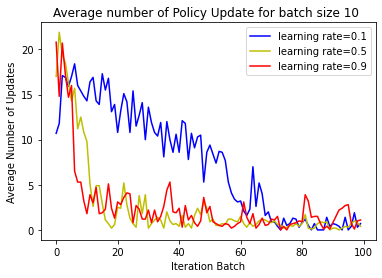

In [145]:
#produce plot for paper.  Changed the number of iteration to 1000 in lnie 269 of the class code above first.

avg_vec=[]
lr_vec=[.1,.5,.9]
for j in range(3):
    mdp=TransportationMDP(100,[3,78])
    mdp.qLearning(lr_vec[j],.99)
    temp=mdp.q_learning
    temp.append(0)
    avg=[]
    for i in range(100):
        sm=0
        for j in range(10):
            sm=sm+temp[i*10+j]
        temp_avg=sm/10
        avg.append(temp_avg)
    avg_vec.append(avg)
    
ax=plt.axes()
#plt.plot(avg2, color="b",label="lr=.1")
plt.plot(avg_vec[0], color="b",label="learning rate="+str(lr_vec[0]))
plt.plot(avg_vec[1], color="y",label="learning rate="+str(lr_vec[1]))
plt.plot(avg_vec[2], color="r",label="learning rate="+str(lr_vec[2]))
#plt.plot(avg4, color="g",label="learning rate=.01")
plt.ylabel('Average Number of Updates')
plt.xlabel('Iteration Batch')
plt.title("Average number of Policy Update for batch size 10 ")
plt.legend(loc="best")
plt.show()    

In [48]:
#policy iteration

Policy Iteration Converged in 0.0684 seconds
iterations:  29


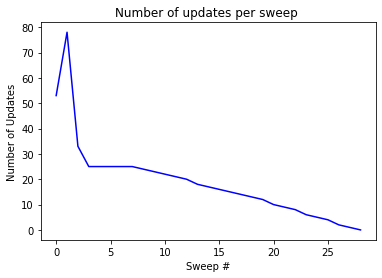

{1: 'walk',
 2: 'walk',
 3: 'swim',
 4: 'walk',
 5: 'walk',
 6: 'walk',
 7: 'walk',
 8: 'walk',
 9: 'walk',
 10: 'walk',
 11: 'walk',
 12: 'walk',
 13: 'walk',
 14: 'walk',
 15: 'walk',
 16: 'walk',
 17: 'walk',
 18: 'walk',
 19: 'walk',
 20: 'walk',
 21: 'walk',
 22: 'walk',
 23: 'walk',
 24: 'walk',
 25: 'tram',
 26: 'walk',
 27: 'walk',
 28: 'walk',
 29: 'walk',
 30: 'walk',
 31: 'walk',
 32: 'walk',
 33: 'walk',
 34: 'walk',
 35: 'walk',
 36: 'walk',
 37: 'walk',
 38: 'walk',
 39: 'walk',
 40: 'walk',
 41: 'walk',
 42: 'walk',
 43: 'walk',
 44: 'walk',
 45: 'walk',
 46: 'walk',
 47: 'walk',
 48: 'walk',
 49: 'walk',
 50: 'tram',
 51: 'walk',
 52: 'walk',
 53: 'walk',
 54: 'walk',
 55: 'walk',
 56: 'walk',
 57: 'walk',
 58: 'walk',
 59: 'walk',
 60: 'walk',
 61: 'walk',
 62: 'walk',
 63: 'walk',
 64: 'walk',
 65: 'walk',
 66: 'walk',
 67: 'walk',
 68: 'walk',
 69: 'walk',
 70: 'walk',
 71: 'walk',
 72: 'walk',
 73: 'walk',
 74: 'walk',
 75: 'walk',
 76: 'walk',
 77: 'walk',
 78: 'sw

In [171]:
#vary epsilon to produce three figures in the paper.  Also policy is output to populate the table.  Finally, calculation time is also recored.
mdp=TransportationMDP(100,[3,78])
tic = time.perf_counter()
mdp.policyIteration(.90) #value of gamma (discount factor) is the argument
toc = time.perf_counter()
#.1 ->.0637
#.01 ->.0661
#.001 ->.0646
print(f"Policy Iteration Converged in {toc - tic:0.4f} seconds")
mdp.plot_policy_stats()
mdp.pi

1 state V(s) pi(s)
  1     -9.01522909781639    walk
  2     -9.01522909781639    walk
  3     -9.01522909781639    walk
  4     -9.01522909781639    walk
  5     -9.01522909781639    walk
  6     -9.01522909781639    walk
  7     -9.01522909781639    walk
  8     -9.01522909781639    walk
  9     -9.01522909781639    walk
  10     -9.01522909781639    walk
  11     -9.01522909781639    walk
  12     -9.01522909781639    walk
  13     -8.980290954003046    walk
  14     -8.904827818556699    walk
  15     -8.802359678953437    walk
  16     -8.679046723089265    walk
  17     -8.537227913100903    walk
  18     -8.377211909828588    walk
  19     -8.198177906553363    walk
  20     -7.998622679096216    walk
  21     -7.776575702457875    walk
  22     -7.529695032683821    walk
  23     -7.255301107069353    walk
  24     -6.950377348898397    walk
  25     -6.611552072131058    tram
  26     -9.01522909781639    walk
  27     -9.01522909781639    walk
  28     -9.01522909781639    wa

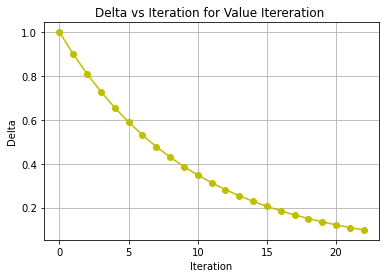

In [7]:
#value iteration output
mdp=TransportationMDP(100,[3,78])
tic = time.perf_counter()
mdp.valueIteration(True,.9)  #true/false will/willnot show graph.  parameter (.9) is the discount factor
toc = time.perf_counter()

print(f"Policy Iteration Converged in {toc - tic:0.4f} seconds")

mdp.plot_valstats()

In [ ]:
#vary epsilon and rerun to get different delta vectors.  Need to first go into the code and change the value of epsilon to obtain these results
#del1=mdp.delta  #.1  conv .0379
#del2=mdp.delta  #.01 conv .0947
#del3=mdp.delta #.001 conv .1103

In [371]:
del3=mdp.delta #.001
print(len(del3))

50


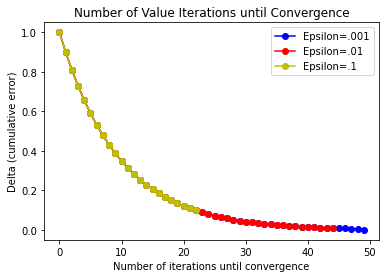

In [385]:


ax=plt.axes()

plt.plot(del3, 'o-',color="b",
        label="Epsilon=.001")

plt.plot(del2,'o-', color="r",
        label="Epsilon=.01")

plt.plot(del1,'o-', color="y",
        label="Epsilon=.1")

#plt.grid()
plt.ylabel('Delta (cumulative error)')
plt.xlabel('Number of iterations until convergence')
plt.title("Number of Value Iterations until Convergence")
plt.legend(loc="best")
